In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#df = pd.read_csv('../../data/anemia_synth_dataset_some_nans_unspecified_more_feats.csv')
#df = pd.read_csv('../../data/more_features/more_feats_new_labels_0.1.csv')
#df = pd.read_csv('../../data/more_features/with_correlated_feature_0.1.csv')
df = pd.read_csv('../../data/more_features/more_feats_correlated_0.1.csv')
df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
0,11.183192,187.573466,4.951674,1.661383,316.593436,95.006424,181.242992,3.531295,1,NaN,28.040619,96.721542,49.530542,23.186628,NaN,33.549575,57.247868,Hemolytic anemia
1,14.387445,NaN,NaN,NaN,NaN,NaN,125.249617,NaN,1,NaN,98.357508,112.758764,62.464566,7.168920,NaN,43.162335,NaN,No anemia
2,12.749357,5.012158,3.502800,6.179371,498.418768,76.759285,159.834784,4.982859,1,1.022939,56.850479,75.739552,72.072041,20.600875,44.872138,38.248071,32.068372,Iron deficiency anemia
3,11.508870,197.180945,1.200125,0.000000,457.033309,102.900301,131.177927,3.355346,1,NaN,111.220307,66.999185,18.353272,14.132423,NaN,34.526609,28.702050,Unspecified anemia
4,9.456656,427.952052,NaN,0.660252,NaN,104.543774,NaN,2.713693,0,NaN,NaN,NaN,NaN,NaN,NaN,28.369968,NaN,Vitamin B12/Folate deficiency anemia


In [17]:
df.isna().sum()

hemoglobin                   0
ferritin                 25000
ret_count                25000
segmented_neutrophils    22300
tibc                     25900
mcv                       5000
serum_iron               25900
rbc                       5000
gender                       0
creatinine               38500
cholestrol               25900
copper                   25900
ethanol                  19600
folate                   25900
glucose                  51100
hematocrit                   0
tsat                     42191
label                        0
dtype: int64

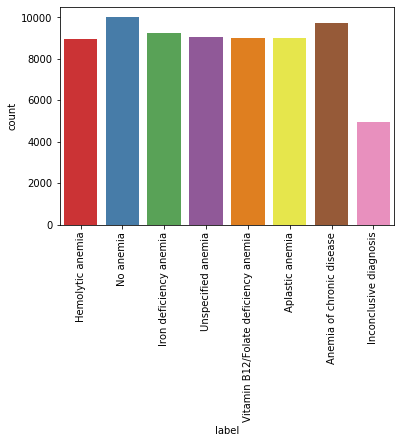

In [18]:
plt.xticks(rotation=90)
sns.countplot(x='label', data=df, palette = 'Set1')

In [19]:
def plot_feature_frequencies(df):
    output_df  = pd.DataFrame()
    for col in df.columns:
        if col != 'label':
            missing_num = df.isna().sum()[col]
            present_num = df.notna().sum()[col]
            col_dict = {'feature name':col, 'present': present_num, 'missing':missing_num,}
            output_df = output_df.append(col_dict, ignore_index=True)
    output_df = output_df[['feature name', 'present', 'missing']]
    output_df.plot(x='feature name', kind='bar', figsize=(8,6), stacked=True)
    return output_df

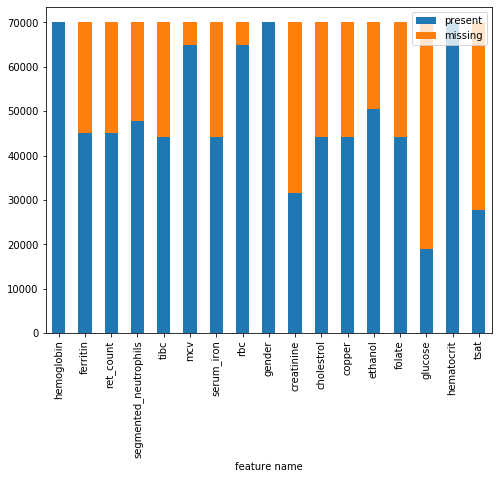

In [20]:
output_df = plot_feature_frequencies(df)

In [21]:
len(df)

70000

#### Correlation matrix

In [22]:
corr_cols = [col for col in df.columns if col not in ['gender', 'label']]
corr_df = df[corr_cols]
corr_df.corr()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat
hemoglobin,1.000000,0.050477,0.026527,0.071636,-0.076578,-0.005201,0.000594,0.894313,-0.002385,-0.002550,-0.000079,0.001521,0.005741,-0.002869,1.000000,0.040648
ferritin,0.050477,1.000000,-0.011303,-0.050028,-0.361505,0.249131,-0.001752,-0.064937,0.003610,0.010145,-0.003281,-0.000513,-0.000450,0.007710,0.050477,0.172561
ret_count,0.026527,-0.011303,1.000000,-0.053356,0.019873,0.025303,-0.000535,0.011404,-0.002245,0.000637,-0.003757,0.007727,-0.001904,-0.006070,0.026527,-0.008983
segmented_neutrophils,0.071636,-0.050028,-0.053356,1.000000,0.025611,-0.306770,-0.007212,0.171708,0.002655,0.000799,0.003818,-0.006637,-0.004465,-0.002271,0.071636,-0.011516
tibc,-0.076578,-0.361505,0.019873,0.025611,1.000000,-0.235020,-0.002446,0.042373,-0.023329,-0.004042,0.003040,0.002592,-0.001218,-0.019836,-0.076578,-0.629879
mcv,-0.005201,0.249131,0.025303,-0.306770,-0.235020,1.000000,-0.001847,-0.439167,0.002686,0.003877,-0.003144,0.005461,0.005495,-0.012808,-0.005201,0.113452
serum_iron,0.000594,-0.001752,-0.000535,-0.007212,-0.002446,-0.001847,1.000000,-0.001517,-0.001298,-0.000037,0.002514,0.003485,-0.001291,-0.004285,0.000594,0.649058
rbc,0.894313,-0.064937,0.011404,0.171708,0.042373,-0.439167,-0.001517,1.000000,-0.001756,-0.001459,0.000545,0.000312,0.001366,0.002694,0.894313,-0.018171
creatinine,-0.002385,0.003610,-0.002245,0.002655,-0.023329,0.002686,-0.001298,-0.001756,1.000000,0.004422,-0.001006,0.001940,0.007246,-0.013322,-0.002385,0.010231
cholestrol,-0.002550,0.010145,0.000637,0.000799,-0.004042,0.003877,-0.000037,-0.001459,0.004422,1.000000,0.002451,0.001432,0.000884,-0.006310,-0.002550,0.004550


In [23]:
def heat_map(df):
    plt.figure(figsize=(9,7))
    plt.title('Correlation Matrix')
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.show()

In [24]:
df.columns

Index(['hemoglobin', 'ferritin', 'ret_count', 'segmented_neutrophils', 'tibc',
       'mcv', 'serum_iron', 'rbc', 'gender', 'creatinine', 'cholestrol',
       'copper', 'ethanol', 'folate', 'glucose', 'hematocrit', 'tsat',
       'label'],
      dtype='object')

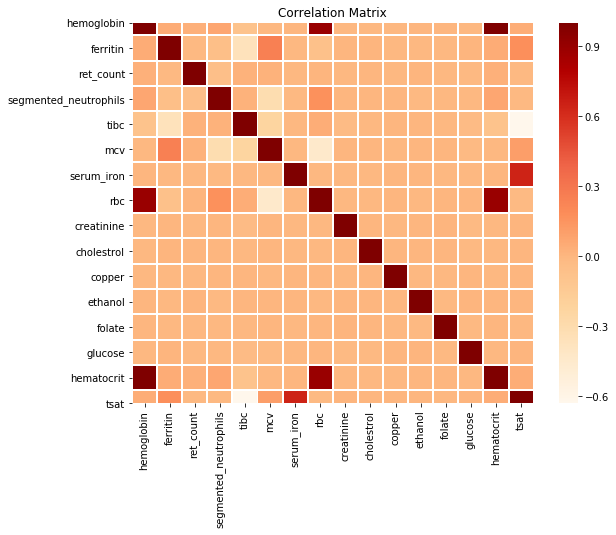

In [25]:
heat_map(corr_df.corr())